In [52]:
# set path
rootdir = '/Users/rj/'
import os,sys
# append the path where your scripts are
sys.path.append(rootdir+"soft/python/") 
# import your own packages
from universal import *
plot_conf()

# params = {'text.latex.preamble': [r'\usepackage{siunitx}', 
#    r'\usepackage{sfmath}', r'\sisetup{detect-family = true}',
#    r'\usepackage{amsmath}']}   
# plt.rcParams.update(params)   

workdir = '/Users/rj/Fellow-CERN/SAD/SuperKEKB/PhaseII/BGS_lifetime/'
os.chdir(workdir)
import scipy;
from scipy.integrate import quad, dblquad
import ipywidgets

from matplotlib.ticker import AutoMinorLocator

In [77]:
c0=2.9979e8;
cir=3016;
nturns=500;
np_h = 2.27e10;
np_l = 2.7e10;

dat0 = loadtxt('./HER_woBB_woColl/loss_map_500.dat')
loc0, npi0 = transpose(dat0)

dat0 = loadtxt('./HER_woBB_wColl/loss_map_500.dat')
loc1, npi1 = transpose(dat0)

# dat0 = loadtxt('./LER_woBB_woColl_noErr/loss_map_500.dat')
dat0 = loadtxt('./LER_woBB_woColl/loss_map_500.dat')
loc2, npi2 = transpose(dat0)

dat0 = loadtxt('./LER_woBB_wColl/loss_map_500.dat')
loc3, npi3 = transpose(dat0)

In [78]:
# import Twiss data1/2
# 
twissHER = loadtxt('./HER_woBB_woColl/Twiss_HER.dat',usecols=range(1,15))
pos_h, num_h, bx_h, ax_h, by_h, ay_h, ex_h, epx_h, ey_h, epy_h, DX_h, DPX_h, DY_h, DPY_h = transpose(twissHER)

twissLER = loadtxt('./LER_woBB_woColl/Twiss_LER.dat',usecols=range(1,15))
pos_l, num_l, bx_l, ax_l, by_l, ay_l, ex_l, epx_l, ey_l, epy_l, DX_l, DPX_l, DY_l, DPY_l = transpose(twissLER)

In [79]:
tau0 = (sum(npi0)/(cir*nturns/c0)/np_h)**-1
tau1 = (sum(npi1)/(cir*nturns/c0)/np_h)**-1

tau2 = (sum(npi2)/(cir*nturns/c0)/np_l)**-1
tau3 = (sum(npi3)/(cir*nturns/c0)/np_l)**-1

print(r'BGS lifetime(HER, w/o Coll)=%.1f mins'%(tau0/60))
print(r'BGS lifetime(HER, w/ Coll) =%.1f mins'%(tau1/60))

print(r'BGS lifetime(LER, w/o Coll)=%.1f mins'%(tau2/60))
print(r'BGS lifetime(LER, w/ Coll) =%.1f mins'%(tau3/60))

BGS lifetime(HER, w/o Coll)=99.4 mins
BGS lifetime(HER, w/ Coll) =76.0 mins
BGS lifetime(LER, w/o Coll)=64.4 mins
BGS lifetime(LER, w/ Coll) =36.1 mins


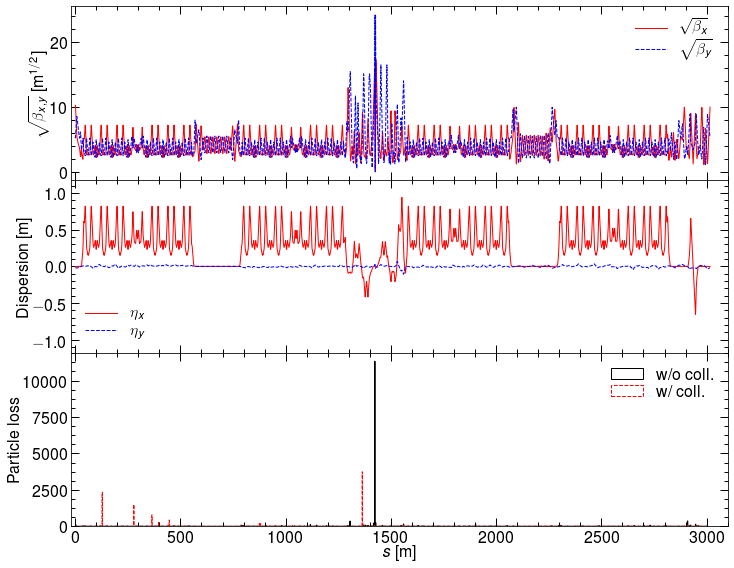

In [75]:
fig, axs = plt.subplots(3, 1, sharex = True, figsize = (12, 9.5))
fig.subplots_adjust(hspace=0)
axs[0].plot(pos_h, sqrt(bx_h), 'r-', lw=1, markersize=3, label = r'$\sqrt{\beta_x}$')
axs[0].plot(pos_h, sqrt(by_h), 'b--', lw=1, label = r'$\sqrt{\beta_y}$')
# axs[0].set_xlim(-0.01, 91)
# axs[0].set_ylim(-2, 120)
# axs[0].set_yticks(np.arange(-3, 3.2))
axs[0].set_ylabel(r'$\sqrt{\beta_{x,y}}$ [m$^{1/2}$]', fontdict=font)
axs[0].legend(loc = 'best', frameon=False,)

axs[1].plot(pos_h, ex_h, 'r-', lw=1, markersize=3, label = r'$\eta_x$')
axs[1].plot(pos_h, ey_h, 'b--', lw=1, label = r'$\eta_y$')
# axs[1].set_xlim(-0.01, 91)
axs[1].set_ylim(-1.18, 1.18)
# axs[1].set_yticks(np.arange(-3, 3.2))
axs[1].set_ylabel(r'Dispersion [m]', fontdict=font)
axs[1].legend(loc = 'best', frameon=False,)


axs[2].hist(loc0, bins=1500, histtype='step', stacked=True, fill=False, color = 'black', label = r'w/o coll.')
axs[2].hist(loc1, bins=1500, histtype='step', stacked=True, fill=False, color = 'red', label = r'w/ coll.')
# axs[2].set_ylim(-700, 700)
# axs[2].set_yticks(np.arange(-3, 2.2))
axs[2].set_xlabel(r'$s$ [m]', fontdict=font)
axs[2].set_ylabel(r'Particle loss', fontdict=font)
axs[2].legend(loc = 'best', frameon=False,)
axs[2].set_xlim(-20, 3100)

# fig.tight_layout()
plt.show()
fig.savefig('LossMap_HER_woBB_PhaseII.eps')
fig.savefig('LossMap_HER_woBB_PhaseII.pdf')

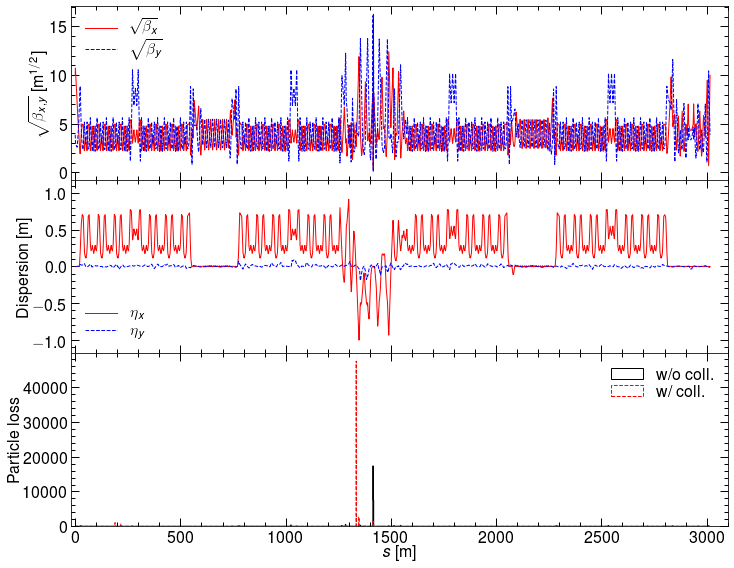

In [74]:
fig, axs = plt.subplots(3, 1, sharex = True, figsize = (12, 9.5))
fig.subplots_adjust(hspace=0)
axs[0].plot(pos_l, sqrt(bx_l), 'r-', lw=1, markersize=3, label = r'$\sqrt{\beta_x}$')
axs[0].plot(pos_l, sqrt(by_l), 'b--', lw=1, label = r'$\sqrt{\beta_y}$')
# axs[0].set_xlim(-0.01, 91)
# axs[0].set_ylim(-2, 120)
# axs[0].set_yticks(np.arange(-3, 3.2))
axs[0].set_ylabel(r'$\sqrt{\beta_{x,y}}$ [m$^{1/2}$]', fontdict=font)
axs[0].legend(loc = 'best', frameon=False,)

axs[1].plot(pos_l, ex_l, 'r-', lw=1, markersize=3, label = r'$\eta_x$')
axs[1].plot(pos_l, ey_l, 'b--', lw=1, label = r'$\eta_y$')
# axs[1].set_xlim(-0.01, 91)
axs[1].set_ylim(-1.18, 1.18)
# axs[1].set_yticks(np.arange(-3, 3.2))
axs[1].set_ylabel(r'Dispersion [m]', fontdict=font)
axs[1].legend(loc = 'best', frameon=False,)


axs[2].hist(loc2, bins=1500, histtype='step', stacked=True, fill=False, color = 'black', label = r'w/o coll.')
axs[2].hist(loc3, bins=1400, histtype='step', stacked=True, fill=False, color = 'red', label = r'w/ coll.')
# axs[2].set_ylim(-700, 700)
# axs[2].set_yticks(np.arange(-3, 2.2))
axs[2].set_xlabel(r'$s$ [m]', fontdict=font)
axs[2].set_ylabel(r'Particle loss', fontdict=font)
axs[2].legend(loc = 'best', frameon=False,)
axs[2].set_xlim(-20, 3100)

# fig.tight_layout() N
plt.show()
fig.savefig('LossMap_LER_woBB_PhaseII.eps')
fig.savefig('LossMap_LER_woBB_PhaseII.pdf')

In [4]:
dat0 = loadtxt('LER_woBB_woColl/Apert_noColl.dat')
s_apert, Ax_apert, Ay_apert = transpose(dat0)

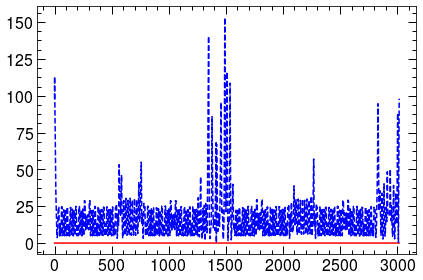

In [8]:
fig = plt.figure()
plt.plot(s_apert, Ax_apert)
plt.plot(pos_l, bx_l)

fig.tight_layout()
plt.show()